In [ ]:
import re
import string
import numpy as np
import pandas as pd
from collections import Counter

import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

import folium
from folium.plugins import HeatMap
from wordcloud import WordCloud, STOPWORDS

### Functions To Count Unqiue Categorical And Numerical Values

In [ ]:
def count_unique_categorical(df, col):
	for i in col:
		print('Column Name: ', i)
		print(df[i].value_counts(normalize=True))
		print()

In [ ]:
def count_unique_numerical(df, col):
    for i_num in col:
        print('Column Name: ', i_num)
        print('Max: ', df[i_num].max(), ' Min: ', df[i_num].min())
        print('Median', df[i_num].median())
        print('Mean', df[i_num].mean())
        print()

### Reviews Data

In [ ]:
# Import cleaned and preprocessed DF
reviews = pd.read_csv('processed_reviews.csv', lineterminator='\n')
reviews.head(5)

listing_id                                           comments language  \
0        2595                                  Great experience.       en   
1        2595  I've stayed with my friend at the Midtown Cast...       en   
2        2595  We've been staying here for about 9 nights, en...       en   
3        2595  We had a wonderful stay at Jennifer's charming...       en   
4        2595  Hi to everyone!\r Would say our greatest compl...       en   

   num_words  
0          2  
1         85  
2         60  
3         23  
4         96

In [ ]:
# To find the distribution of the number of words
px.box(reviews, x="num_words")

In [ ]:
locate_max_words_review = reviews.iloc[reviews['num_words'].argmax()]
print(locate_max_words_review[1])

Looking forward to the New Year holiday, my friend and I flew all the way from Los Angeles, California, to New York, considering Airbnb as a good option to stay at, in which we trusted through previous experiences. However, the stay at Nadia and Myles' place in South Harlem reputed in a terrible case of PTSD, financial damage, and may still result in future medical bills due to exposure to biohazards conditions, and hantavirus. The fallacious behavior of the owner, who very reluctantly, after a few long emails, and images forwarded, admitted the obvious rat and rodent infestation; and refused any type of refund or remedy, due to his personal thoughts, regardless of evidence found in the unit, in which there were previous roach and rat traps.  First of all, the unit was highly infested by the rats, and roaches. Upon arrival, cockroach feces on "clean plates" left in the kitchen drying slats, on silverware, on the walls, and rat feces smeared into the floor, and left in various places in

In [ ]:
print("Listing ID", locate_max_words_review[0])

Listing ID 26602263


The review that had 991 words seems like the traveller had a bad experience. Hence, he left an expectionally long review after his stay. 

### Listings Data

In [ ]:
# Import cleaned and preprocessed DF
listings = pd.read_csv('combined_train.csv')
listings

id                                               name  \
0      43156881  Private bedroom, walk in closet and private bath!   
1      36179952         Chic, Bright, & Cozy West Village Walk- Up   
2      51985589            Incredible studio rental in Manhattan 😍   
3      37503226  NY.  New York. Manhattan. Upper west. Centre Park   
4      20928429    Private cozy room- W 145st & Saint Nicholas Ave   
...         ...                                                ...   
23092   2508374                Cozy 1br mins from Casino Jfk & Nyc   
23093   9685865                 Pvt Room+Pvt Bathroom; NO KITCHEN!   
23094  30706240         Cozy New York Apartment. Amazing Location!   
23095   1091840                  Private bedroom in Manhattan, NYC   
23096  40925588                  THE LINCOLN SUITES BROOKLYN - 590   

                                             description  \
0      1 bedroom available in a shared apartment. Ver...   
1      Chic, light, & bright in the heartbeat of down...   
2      Come enjoy this stylish and peaceful Manhattan...   
3      - New York. Manhattan. Upper West. - 5 minutes...   
4      Cozy and very clean place in Harlem. TV with N...   
...                                                  ...   
23092  This comfortable private 1 Bedroom apartment i...   
23093  Covid Vaccination proof/Negative result within...   
23094  Beautiful one bedroom apartment. We turned the...   
23095  Your own private room in a charming and sunny ...   
23096  Beautiful third floor apartment located in the...   

                                   neighborhood_overview  host_since  \
0                                  Hottest neighborhood.  2017-05-08   
1      This is hands down the best neighborhood in al...  2018-06-12   
2                                                No Data  2021-08-31   
3                                                No Data  2019-08-06   
4      Is a very unique area of Harlem. The apartment...  2016-08-29   
...                                                  ...         ...   
23092  This apartment is located only 3 minutes from ...  2013-08-31   
23093  - All shops within 2 minutes walk. - Public tr...  2015-11-28   
23094                                            No Data  2015-06-07   
23095  Safety: I have lived in the neighborhood for a...  2013-01-15   
23096  Barclays  (1.5mi) Prospect park  (1.0mi) Grand...  2017-05-17   

       host_response_time  host_response_rate  host_acceptance_rate  \
0      a few days or more                13.0                   0.0   
1                 No Data                 NaN                   NaN   
2            within a day                90.0                 100.0   
3                 No Data                 NaN                   NaN   
4                 No Data                 NaN                   NaN   
...                   ...                 ...                   ...   
23092      within an hour               100.0                 100.0   
23093      within an hour               100.0                 100.0   
23094             No Data                 NaN                   NaN   
23095      within an hour                95.0                  61.0   
23096      within an hour               100.0                  99.0   

      host_is_superhost  host_listings_count  ...  \
0                     f                  1.0  ...   
1                     f                  1.0  ...   
2                     f                  0.0  ...   
3                     f                  0.0  ...   
4                     f                  1.0  ...   
...                 ...                  ...  ...   
23092                 f                  2.0  ...   
23093                 f                  1.0  ...   
23094                 f                  1.0  ...   
23095                 t                  9.0  ...   
23096                 t                  0.0  ...   

                                           amenities_str name_lang  \
0      "Iron", "Lock on be

In [ ]:
listings.columns

Index(['id', 'name', 'description', 'neighborhood_overview', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'amenities_str',

In [ ]:
listings.head(5)

id                                               name  \
0  43156881  Private bedroom, walk in closet and private bath!   
1  36179952         Chic, Bright, & Cozy West Village Walk- Up   
2  51985589            Incredible studio rental in Manhattan 😍   
3  37503226  NY.  New York. Manhattan. Upper west. Centre Park   
4  20928429    Private cozy room- W 145st & Saint Nicholas Ave   

                                         description  \
0  1 bedroom available in a shared apartment. Ver...   
1  Chic, light, & bright in the heartbeat of down...   
2  Come enjoy this stylish and peaceful Manhattan...   
3  - New York. Manhattan. Upper West. - 5 minutes...   
4  Cozy and very clean place in Harlem. TV with N...   

                               neighborhood_overview  host_since  \
0                              Hottest neighborhood.  2017-05-08   
1  This is hands down the best neighborhood in al...  2018-06-12   
2                                            No Data  2021-08-31   
3                                            No Data  2019-08-06   
4  Is a very unique area of Harlem. The apartment...  2016-08-29   

   host_response_time  host_response_rate  host_acceptance_rate  \
0  a few days or more                13.0                   0.0   
1             No Data                 NaN                   NaN   
2        within a day                90.0                 100.0   
3             No Data                 NaN                   NaN   
4             No Data                 NaN                   NaN   

  host_is_superhost  host_listings_count  ...  \
0                 f                  1.0  ...   
1                 f                  1.0  ...   
2                 f                  0.0  ...   
3                 f                  0.0  ...   
4                 f                  1.0  ...   

                                       amenities_str name_lang  \
0  "Iron", "Lock on bedroom door", "Carbon monoxi...        en   
1  "Hot water", "Iron", "Shower gel", "Refrigerat...        en   
2  "Hot water", "Paid washer \u2013 In building",...        en   
3  "Hot water", "Microwave", "Smoke alarm", "Elev...        en   
4  "Hot water", "Iron", "Refrigerator", "Cleaning...        en   

  description_lang host_months dist_to_subway  \
0               en          56       0.272894   
1               en          43       0.137855   
2               en           5       0.690793   
3               ko          29       0.345179   
4               en          65       0.185937   

                                            comments  \
0                                                NaN   
1    great location great location and super stylish   
2  danilo wa an excellent host very honest and ex...   
3  moonim wa very welcoming and the place wa real...   
4  great place to stay in harlem it wa best gusto...   

                                    processed_name  \
0  private bedroom walk in closet and private bath   
1            chic bright cozy west village walk up   
2            incredible studio rental in manhattan   
3     ny new york manhattan upper west centre park   
4     private cozy room w 145st saint nicholas ave   

                               processed_description  \
0  1 bedroom available in a shared apartment very...   
1  chic light bright in the heartbeat of downtown...   
2  come enjoy this stylish and peaceful manhattan...   
3  new york manhattan upper west 5 minute walk to...   
4  cozy and very clean place in harlem tv with ne...   

                     processed_neighborhood_overview  \
0                               hottest neighborhood   
1  this is hand down the best neighborhood in all...   
2                                            no data   
3                                            no data   
4  is a very unique area of harlem the apartment ...   

                                       combined_text  
0  private bedroom walk in closet and private bat...  
1  chic bright cozy west villa

### Categorical Columns

In [ ]:
# Inspect the values in categorical columns
find_unique_values_cat_col=["neighbourhood_group_cleansed", "neighbourhood_cleansed", "host_response_time", "instant_bookable", "property_type", "room_type", 
                            "host_identity_verified", "host_has_profile_pic", "host_is_superhost", "has_availability", "bathrooms_text"]

### Overview of the Categorial Variables

In [ ]:
count_unique_categorical(listings, find_unique_values_cat_col)

Column Name:  neighbourhood_group_cleansed
Manhattan        0.407369
Brooklyn         0.405637
Queens           0.146989
Bronx            0.030134
Staten Island    0.009871
Name: neighbourhood_group_cleansed, dtype: float64

Column Name:  neighbourhood_cleansed
Bedford-Stuyvesant    0.079924
Williamsburg          0.069793
Harlem                0.054942
Bushwick              0.046500
Hell's Kitchen        0.042257
                        ...   
Woodrow               0.000043
New Dorp              0.000043
Willowbrook           0.000043
Castle Hill           0.000043
Graniteville          0.000043
Name: neighbourhood_cleansed, Length: 220, dtype: float64

Column Name:  host_response_time
No Data               0.380699
within an hour        0.348314
within a few hours    0.141966
within a day          0.088496
a few days or more    0.040525
Name: host_response_time, dtype: float64

Column Name:  instant_bookable
f    0.733039
t    0.266961
Name: instant_bookable, dtype: float64

Column Na

### Numerical Columns

In [ ]:
# Inspect the values in numerical columns
find_unique_values_num_col=["host_response_rate", "host_acceptance_rate", "accommodates", "bedrooms", 
                            "beds", "availability_30", "availability_60","availability_90", "availability_365","review_scores_rating", 
                            "review_scores_accuracy", "review_scores_cleanliness","review_scores_checkin",
                            "review_scores_communication","review_scores_location","review_scores_value", 'price', 'number_of_reviews', 'host_months']

In [ ]:
count_unique_numerical(listings,find_unique_values_num_col)

Column Name:  host_response_rate
Max:  100.0  Min:  0.0
Median 100.0
Mean 89.79348434004474

Column Name:  host_acceptance_rate
Max:  100.0  Min:  0.0
Median 90.0
Mean 76.11917376433506

Column Name:  accommodates
Max:  16  Min:  1
Median 2.0
Mean 2.8567779365285535

Column Name:  bedrooms
Max:  13  Min:  1
Median 1.0
Mean 1.3319911676841147

Column Name:  beds
Max:  24  Min:  1
Median 1.0
Mean 1.618132224964281

Column Name:  availability_30
Max:  1.0  Min:  0.0
Median 0.0666666666666666
Mean 0.3647183616919946

Column Name:  availability_60
Max:  1.0  Min:  0.0
Median 0.1833333333333333
Mean 0.4045547040741222

Column Name:  availability_90
Max:  1.0  Min:  0.0
Median 0.3
Mean 0.4226975124234508

Column Name:  availability_365
Max:  1.0  Min:  0.0
Median 0.2301369863013698
Mean 0.37764223664224916

Column Name:  review_scores_rating
Max:  5.0  Min:  0.0
Median 4.7
Mean 3.52697233406936

Column Name:  review_scores_accuracy
Max:  5.0  Min:  0.0
Median 4.79
Mean 3.571131748711954

Colu

Based on the inspection above, we have found the following:
1) Price of some of the listings are as high as $10,000
2) Review scores of listings range from 0 to 5
3) Hosts' acceptance and response range from 0 to 100
4) Number of accommodates ranges from 1 to 16
5) Number of reivews per listing ranges from 0 to 829
6) Number of months since the host listed its rental listing ranges from 1 to 161 

### Price

In [ ]:
# To find the distribution of the price of listings
px.box(listings, x="price", title="Distribution of Price")

The box plot shows the distribution of prices for the listings. It seems that there are quite a few listings that are above the upper quartile (3Q + 1.5*IQR), which indicates that there might be outliers in the dataset.

In [ ]:
# Inspect on listings with price > 1000

listings_above_1000 = listings.loc[listings['price'] > 1000]
listings_above_1000

id                                               name  \
262    11226397     Broadway, Time Square; Wyndham 45 at Manhattan   
269    41459574        Your Private Home with Yard In Williamsburg   
369    38993556                   The Gregory Hotel, Tailored King   
451    42475642  NYE 2020 Deluxe NYC Resort by MACY'S & Time Sq...   
802    52656553        Peaceful and Quiet Student Room in New York   
...         ...                                                ...   
22446  50227515        Nice Solo Queen Bedroom with AC and heating   
22508  14490720                           Amazing apartment in NYC   
22618  47022274    Fantastic Designer Loft in the Heart of Tribeca   
23004  49010997  Family Vacay! 4 Modern Units, Restaurant, Roof...   
23088  46511472  Big Beautiful Bedroom & Bath in Classic Apartment   

                                             description  \
262    Take a bite out of the Big Apple at Wyndham Mi...   
269    Entire two family home available in the heart ...   
369    Herald Square gem dating back to 1903, steps f...   
451    On an island famous for it's sights & sounds a...   
802      Take a break and unwind at this peaceful oasis.   
...                                                  ...   
22446  Beautiful bedroom with queen sized bed, a high...   
22508  Amazing spacious apartment, all Bills included...   
22618  The elevator opens directly into this light-fl...   
23004  Located two blocks from Bryant Park, this prop...   
23088  Extra large bedroom with private bath in 2 BR/...   

                                   neighborhood_overview  host_since  \
262    Perfectly located at 45th St and 3rd Ave, righ...  2015-10-26   
269       Close to shops ,restaurants and transportation  2019-08-23   
369                                              No Data  2019-09-27   
451    There is a plethora of famous landmarks locate...  2016-12-31   
802                                              No Data  2021-08-10   
...                                                  ...         ...   
22446                                            No Data  2021-06-05   
22508  1 block to Restaurants, Bars and shopping,  2 ...  2015-05-26   
22618                                            No Data  2012-06-12   
23004  5th Avenue - 0.2 miles;  Bryant Park - 0.2 mil...  2013-03-25   
23088                                            No Data  2013-07-31   

       host_response_time  host_response_rate  host_acceptance_rate  \
262    within a few hours                97.0                  46.0   
269        within an hour               100.0                 100.0   
369    a few days or more                 0.0                   NaN   
451               No Data                 NaN                   NaN   
802    within a few hours               100.0                  39.0   
...                   ...                 ...                   ...   
22446             No Data                 NaN                   NaN   
22508             No Data                 NaN                   NaN   
22618             No Data                 NaN                   NaN   
23004      within an hour               100.0                  95.0   
23088             No Data                 NaN                   NaN   

      host_is_superhost  host_listings_count  ...  \
262                   f                 73.0  ...   
269                   t                  4.0  ...   
369                   f                  5.0  ...   
451                   f                  1.0  ...   
802                   f                  1.0  ...   
...                 ...                  ...  ...   
22446                 f                  0.0  ...   
22508                 f                  1.0  ...   
22618                 f                  1.0  ...   
23004                 f               3338.0  ...   
23088                 f                  0.0  ...   

                                           amenities_str name_lang  \
262    "Hot water", "Iron"

There are a total of 176 listings that are priced above $1,000 and they are considered to be outliers. Hence, our group will be removing them.

In [ ]:
# Inspect the distribution of price for listings $1000 and below per night

listings = listings[listings["price"] <= 1000]
px.box(listings, x="price")

In [ ]:
px.histogram(listings, x="price")

In [ ]:
px.box(listings, x="price")
print("There are a total of",listings["price"].count(), "that are below $1000")


There are a total of 22921 that are below $1000


In [ ]:
print("Median price of listings")
print("{:.2f}".format(listings["price"].median()))

Median price of listings
105.00


The median price of all listings is USD143.41 (for a benchmark). 
Median price for accommodation in New York City is USD235 according to Statista, Airbnb median of USD143 is much lower.

### Room type

In [ ]:
count1 = listings["room_type"].value_counts()
df = pd.DataFrame({'room_type':count1.index, 'count':count1.values})
df

room_type  count
0  Entire home/apt  11596
1     Private room  10857
2      Shared room    360
3       Hotel room    108

In [ ]:
#Plot distribution of room type
px.bar(df,  text_auto='.2s', title="Distribution of Room Types", x = "room_type", y = "count", color = "room_type", color_discrete_map={
                "Hotel room": "rgb(251,180,174)",
                "Private room": "rgb(179,205,227)",
                "Entire home/apt": "rgb(204,235,197)",
                "Shared room": "rgb(222,203,228)",
                })

From the bar graph, most of the listings are either private rooms or entire homes.

In [ ]:
#Median price of listings across room types
px.bar(listings.groupby(["room_type"]).median().reset_index(), x="room_type", y="price",text_auto='.2s', title="Median Price of Listings across Room Types", color = "room_type", color_discrete_map={
                "Hotel room": "rgb(251,180,174)",
                "Private room": "rgb(179,205,227)",
                "Entire home/apt": "rgb(204,235,197)",
                "Shared room": "rgb(222,203,228)",
                })


Hotel rooms are the most expensive, median USD 188.50, followed by entire homes, private room and shared room. Based on observation, it seems like the type of room might be correlated to the price.

In [ ]:
# Plot Median Review Scores Rating By Room Type
px.bar(listings.groupby(["room_type"]).median().reset_index(), x="room_type", y="review_scores_rating", text_auto='.2s', title="Median Review Score Rating of Listing by Room Type", 
        color = "room_type", color_discrete_map={
                "Hotel room": "rgb(251,180,174)",
                "Private room": "rgb(179,205,227)",
                "Entire home/apt": "rgb(204,235,197)",
                "Shared room": "rgb(222,203,228)",
                })



### Neighbourhood group

In [ ]:
x = listings["neighbourhood_group_cleansed"].value_counts()
px.pie(listings, x.index, x.values, title="Distribution of listings by neighbourhood group")

Most listings are in Brooklyn (40.7%) and Manhattan (40.5%).

In [ ]:
plot_dist_neigh_price=listings.groupby(["neighbourhood_group_cleansed"]).median().reset_index()
px.bar(plot_dist_neigh_price, x="neighbourhood_group_cleansed", y='price', text_auto='.2s', title="Median Price of Listing by Neighbourhood Group", color="neighbourhood_group_cleansed", color_discrete_map={
                "Brooklyn": "#636EFA",
                "Manhattan": "#EF553B",
                "Queens": "#00CC96",
                "Bronx": "#AB63FA",
                "Staten Island": "#FFA15A"
                })

Listings in Manhattan are the most expensive, median of USD 140, higher than the median of all listings. Likely that neighbourhood group of the listing is correlated to the price.

#### Listings in Top 10 Neighbourhoods

In [ ]:
#Top 10 neighbourhoods with the most listings -neighbourhood_cleansed
neighbourhood_topten=listings.groupby('neighbourhood_cleansed').count().reset_index().sort_values(['id'], ascending=False) [:10]
px.bar(neighbourhood_topten, x="neighbourhood_cleansed", y='id', text_auto='.2s', title ="Count of Listings for the Top 10 neighbourhoods", labels={'id':'Count'})


In [ ]:
#Median price for top 10 neighbourhoods with the most listings -neighbourhood_cleansed

neighbourhood_topten_list =[]
for i in neighbourhood_topten["neighbourhood_cleansed"]: 
    neighbourhood_topten_list.append(i)
neighbourhood_topten_price = listings.loc[listings["neighbourhood_cleansed"].isin(neighbourhood_topten_list)]
neighbourhood_topten_price_avg = neighbourhood_topten_price.groupby(["neighbourhood_cleansed"]).median().reset_index()
neighbourhood_topten_price_avg = neighbourhood_topten_price_avg.sort_values(by="price", ascending=False)
px.bar(neighbourhood_topten_price_avg, x="neighbourhood_cleansed", y="price",text_auto='.2s',title="Median Price of Listings for Top 10 Neighbourhood with the Most Listings")

### Heatmap of Listings in New York City 

In [ ]:
# Print the heatmap of the listings in New York City 
new_york_geog=folium.Map([40.7128,-74.0060],zoom_start=10)
HeatMap(listings[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(new_york_geog)
display(new_york_geog)


### Map Box of Price of Listings

In [ ]:
mapbox_price = px.scatter_mapbox(listings, lat="latitude", lon="longitude", color="price", #size="room_type",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                  mapbox_style="carto-positron")
mapbox_price.show()


Based on the Map Box above, it seems like Midtown,Manhattan has the most number of higher priced listings which is consistent with the bar plot above.

### Superhost

Having the status of “Superhost” gives potential guests the knowledge that the host’s rental listings have consistently garnered good reviews and ratings (4.8 and above) over the past 12 months. Moreover, a “superhost” needs to maintain a response rate of at least 90% and a less than 1% cancellation rate. 

In [ ]:
x = listings["host_is_superhost"].value_counts()
px.pie(listings, x.index, x.values, color=x.index, title="Distribution of superhost status", color_discrete_map={
                "t": "rgb(204,235,197)",
                "f": "rgb(251,180,174)"
                })

The host of most listings do not have superhost status, only 21.6% of listings are hosted by superhosts.

In [ ]:
px.bar(listings.groupby(["host_is_superhost"]).median().reset_index(), x="host_is_superhost", y="price", text_auto='.2s',
        title="Median Price of Listings of Status of Host", color = "host_is_superhost", color_discrete_map={
                "f": "rgb(251,180,174)",
                "t": "rgb(204,235,197)"
                })


The difference in median price of listings by superhosts and non-superhosts is not great ($20). This suggests that superhost status is not correlated to the price of the listings

In [ ]:
px.box(listings, x="room_type", y="price", color="host_is_superhost", notched=False, title="Distribution of Listings' Prices")

In [ ]:
is_superhost_listings = px.scatter_matrix(listings,
    dimensions=["bedrooms", "beds", "accommodates", "price"],
    color="host_is_superhost", symbol="host_is_superhost",
    title="Scatter Plot",
    labels={col:col.replace('_', ' ') for col in listings.columns}) # remove underscore
is_superhost_listings.update_traces(diagonal_visible=False)
is_superhost_listings.show()

In [ ]:
superhost_mths_price = px.scatter(listings, x="host_months", y="price", color="host_is_superhost",
                  hover_data=['price'])
superhost_mths_price.show()

Based on the scatter plot above, we are able to conclude that 
1) the more experienced hosts (12 to 160 months) tend to price their listings affordably 
2) hosts with the status "SuperHost" is more likely to set the price of the listings lower as compared to normal hosts

### Property Type

#### Top 10 Property Type with the most listings

In [ ]:
# Top 10 Property Type with the most listings - property_type

property_type_topten = listings["property_type"].value_counts()[:10]
px.bar(property_type_topten,text_auto='.2s', title ="Count of Listings for the Top 10 neighbourhoods", labels={'value':'Count', 'index':'Property Type'})

#### Median Price of Top 10 Property Type with the most listings

In [ ]:
# Median price of listings across room types
property_type_topten_list = property_type_topten.keys().tolist()
property_type_topten_data = listings.loc[listings["property_type"].isin(property_type_topten_list)]
property_type_topten_avg = property_type_topten_data.groupby(["property_type"]).median().reset_index()

px.bar(property_type_topten_avg.groupby(["property_type"]).median().reset_index(), x="property_type", y="price",text_auto='.2s', title="Median Price of Lisitings across Propety Types")

#### Median Review Score Rating of Listing by Room Type

In [ ]:

px.bar(property_type_topten_avg.groupby(["property_type"]).median().reset_index(), x="property_type", y="review_scores_rating", text_auto='.2s', title="Median Review Score Rating of Listing by Room Type")


#### Plot Price Against Number of Reviews

In [ ]:
print("Scatter and Density Plot for Price Against Number of Reviews")
px.scatter(listings, x="number_of_reviews", y="price", title="Scatter for Price Against Number of Reviews")

Scatter and Density Plot for Price Against Number of Reviews


Based on the plot above, we are about to observe the following: 

1) The histogranm of the number of reviews is right-skewed, suggesting that  most of the listings have less than 400 reviews. 
2) The histogram of the price of listing is also right-skewed as most of the listings are priced below $400 

#### Review Score Rating Against Price of Listings

In [ ]:

px.scatter(listings, x="review_scores_rating", y="price", title="Scatter for Reivew Score Rating Against Price of Listings")


Based on the plot above, the data suggests that: 
1) There is a significant number of listings that are rated 0 which could suggest that travellers did not rate the overall scores rating. 
2) If we were to remove the listings with rating =0, the histogram of the ratings would be left-skewed as most of the listings are rated above 4. 
3) Likewise, the histogram of the price of listing is also right-skewed as most of the listings are priced below $400


#### Review Score Rating Against Availability of Listing in the Past 1 year

In [ ]:

px.scatter(listings, x="review_scores_rating", y="availability_365", title="Review Score Rating Against Availability of Listing in the Past 1 year")


### Price against Distance(km) to Subway Station

In [ ]:

px.scatter(listings, x="dist_to_subway", y="price", title="Price against Distance to Subway Station")


Base on the scatter plot above, we are able to conclude that the further the listing from the station, the lower the price of the listing. Should the listing is near to subway stations, hosts should price their listings higher to maximise revenue


### Review Scores

In [ ]:
review_rating_dict = {'0.0-0.5':0, '0.5-1.0':0, '1.0-1.5':0, '1.5-2.0':0, '2.0-2.5':0, '2.5-3.0':0, '3.0-3.5':0, '3.5-4.0':0, '4.0-4.5':0, '4.5-5.0':0} 
for x in listings["review_scores_rating"]:
    if x<0.5:
        review_rating_dict['0.0-0.5'] += 1
    if x>=0.5 and x<1.0:
        review_rating_dict['0.5-1.0'] += 1
    if x>=1.0 and x<1.5:
        review_rating_dict['1.0-1.5'] += 1
    if x>=1.5 and x<2.0:
        review_rating_dict['1.5-2.0'] += 1
    if x>=2.0 and x<2.5:
        review_rating_dict['2.0-2.5'] += 1
    if x>=2.5 and x<3.0:
        review_rating_dict['2.5-3.0'] += 1
    if x>=3.0 and x<3.5:
        review_rating_dict['3.0-3.5'] += 1  
    if x>=3.5 and x<4.0:
        review_rating_dict['3.5-4.0'] += 1
    if x>=4.0 and x<4.5:
        review_rating_dict['4.0-4.5'] += 1
    else:
        review_rating_dict['4.5-5.0'] += 1  
print(review_rating_dict)
review_rating_x = review_rating_dict.keys()
review_rating_y = review_rating_dict.values()
px.bar(x=review_rating_x, y=review_rating_y, labels={'x': 'review_scores_rating', 'y': 'count'}, text_auto='.2s', title="Count of Review Score Ratings in Bins") 

{'0.0-0.5': 5645, '0.5-1.0': 0, '1.0-1.5': 102, '1.5-2.0': 8, '2.0-2.5': 62, '2.5-3.0': 26, '3.0-3.5': 239, '3.5-4.0': 257, '4.0-4.5': 2134, '4.5-5.0': 20787}


Most listings have a review score rating of 4.5-5.0

In [ ]:
review_scores_rating_split = listings[listings["review_scores_rating"]>=4.5]
px.histogram(review_scores_rating_split, x="review_scores_rating", nbins=5, text_auto='.2s', title="Histogram of Count of Review Scores Rating 4.5 and above")

In [ ]:
a = sum(listings.review_scores_rating >= 4.9)
b = listings['review_scores_rating'].count()
print("{:.2f}".format(a/b * 100.0), "% of listings have a review score rating of more than or equals to 4.9")

30.71 % of listings have a review score rating of more than or equals to 4.9


In [ ]:
px.box(listings, x="room_type", y="review_scores_rating", color="host_is_superhost", notched=False, title="Distribution of Listings' Prices across the Type of Rooms according to the Status of the Host")

#### Verifitability of Host

In [ ]:
px.box(listings, x="room_type", y="review_scores_rating", color="host_identity_verified", notched=False, title="Distribution of Listings' Prices across the Type of Rooms according to the Verifitability of Host")


### Accommodates

In [ ]:
#Distribution of accommodates
col_label = "A"
col_values = "Count"
colors = ["rgb(8,48,107)",
        "rgb(8,81,156)",
        "rgb(33,113,181)",
        "rgb(66,146,198)",
        "rgb(107,174,214)",
        "rgb(158,202,225)",
        "rgb(179,205,227)",
        "rgb(198,219,239)",
        "rgb(222,235,247)",
        "rgb(247,251,255)"]

y = listings["accommodates"].value_counts().head(10)
new = pd.DataFrame({
    col_label: y.index,
    col_values: y.values
})
new = new.sort_values(
    by=col_label, 
    ascending=True)

fig = go.Figure(
    data=[go.Pie(
        labels=new[col_label],
        values=new[col_values],
        marker=dict(colors=colors),
        sort=False)])
fig.update_layout(title_text="Distribution of accommodates")
fig.show()

In [ ]:
#Accommodates against median price
px.line(listings.groupby(["accommodates"]).median().reset_index(), x="accommodates", y="price", title="Relationship of price against accommodates")

The median price tends to increase with number that listing accommodates.

### Host Response Time

In [ ]:
#Median price of listings across room types
px.bar(listings.groupby(["host_response_time"]).median().reset_index(), x="host_response_time", y="price",text_auto='.2s', title="Median Price of Lisitings across Room Types")

According to Airbnb, the hosts' response time is calculated based on the hosts' responses over the past 365 days. Hence, this suggests that hosts with no 'host_response_time' have not been active over the past year

### Text Columns

### Name of Listings

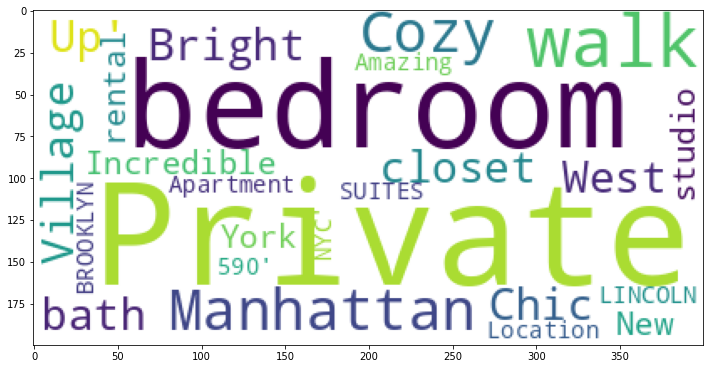

In [ ]:
text = str(listings["name"].values)
stopwords = set(STOPWORDS)
name_wc = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(12,12)) 
plt.imshow(name_wc)

Based on the WordCloud, it seems like most of the listings have "private", "Patio" in the names

### Description

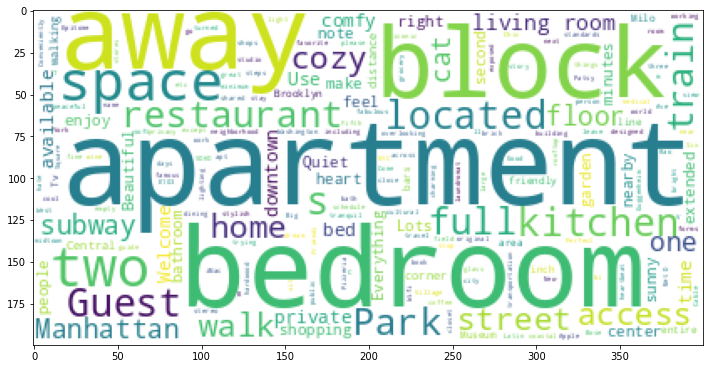

In [ ]:
text2 = str(listings["description"].values)
stopwords = set(STOPWORDS)
name_wc = WordCloud(stopwords=stopwords, background_color="white").generate(text2)
plt.figure(figsize=(12,12)) 
plt.imshow(name_wc)

### Amenities

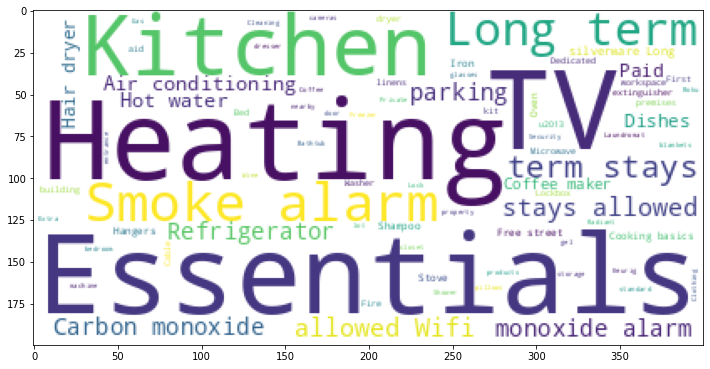

In [ ]:
text3 = str(listings["amenities"].values)
stopwords = set(STOPWORDS)
name_wc = WordCloud(stopwords=stopwords, background_color="white").generate(text3)
plt.figure(figsize=(12,12)) 
plt.imshow(name_wc)

In [ ]:
df1 = listings.copy()
df1['amenities'] = df1.amenities.apply(lambda x: x[1:-1].split(','))
def num_amenities(x):
    return len(x)
df1['num_amenities'] = df1['amenities'].map(lambda x: num_amenities(x))
amenities_count = df1["num_amenities"].value_counts()
df2 = pd.DataFrame({'num_amenities':amenities_count.index, 'count':amenities_count.values})
px.bar(df2,  text_auto='.2s', title="Distribution of Number of Amenities", x = "num_amenities", y = "count")

In [ ]:
px.box(df1, x="num_amenities")

In [ ]:
num_amenities_out = df1.loc[df1['num_amenities'] > 58]
num_amenities_out

#number of amenities > 58 - outliers

id                                               name  \
17     45463521  East Village Oasis Elevator Roof Deck Skyline ...   
42     23877781        Modern Comfort in Carroll Gardens, Brooklyn   
349    49610751    A COZY HOME! 🌈 LGBTQ FRIENDLY- PRIVATE BATHROOM   
381    17367187   SuperHost 1bd/1ba Pre-War NYC Yankee Stadium Apt   
394    51702923            Award-winning Townhouse in Williamsburg   
...         ...                                                ...   
21751  53450382  ✨NEW✨Luxury 2 Bedroom Paradise | Mins 2 Barclays!   
21920  40915527  Entire Place w. Kitchen & Laundry, to Mets LGA...   
22352  53954676  *This must be the place* Glam, cozy apt in Mid...   
22616  11493255                                 Central Park / UWS   
22938  41258335        Family haven in trendy Greenpoint, Brooklyn   

                                             description  \
17     Spacious 900 sq ft. and beautifully furnished ...   
42     Large one bedroom in charming Carroll Gardens-...   
349    we have a puppy in our home The room comes wit...   
381    Some weekends are blocked out. If you are inte...   
394    The Corner Townhouse is a spacious and modern ...   
...                                                  ...   
21751  Stunning, luxurious, modern apartment in the h...   
21920  A quiet & newly renovated entire space within ...   
22352  Trendy, glamorous and cozy queen room in a Spa...   
22616  Gorgeous views of Central Park from private be...   
22938  NEW 30-DAY DISCOUNT $5900 JAN-MARCH 2022. Spac...   

                                   neighborhood_overview  host_since  \
17     East Village is hands down the best neighborho...  2012-02-09   
42     Carroll Gardens is a wonderful neighborhood fi...  2013-09-03   
349    . The apartment is within walking distance of ...  2021-05-05   
381    The neighborhood has everything you could need...  2014-01-11   
394    Welcome to Williamsburg; a pop-culture darling...  2010-12-26   
...                                                  ...         ...   
21751  Introducing a brand new luxury development fea...  2013-06-23   
21920  We are located in East Flushing, a quiet, dive...  2019-12-18   
22352  Just a few blocks from times squares, Empire S...  2018-10-05   
22616  The neighborhood is very lively, always busy w...  2016-02-26   
22938  Greenpoint is a family neighborhood peppered w...  2012-12-10   

       host_response_time  host_response_rate  host_acceptance_rate  \
17         within an hour               100.0                 100.0   
42         within an hour               100.0                  98.0   
349        within an hour               100.0                  97.0   
381          within a day               100.0                  80.0   
394          within a day                80.0                  17.0   
...                   ...                 ...                   ...   
21751      within an hour               100.0                 100.0   
21920      within an hour               100.0                  98.0   
22352      within an hour               100.0                 100.0   
22616  within a few hours               100.0                  74.0   
22938      within an hour               100.0                  88.0   

      host_is_superhost  host_listings_count  ... name_lang description_lang  \
17                    t                  0.0  ...        en               en   
42                    t                  1.0  ...        en               en   
349                   f                  1.0  ...        hi               en   
381                   t                  1.0  ...        en               en   
394                   f                  0.0  ...        en               en   
...                 ...                  ...  ...       ...              ...   
21751                 t                 21.0  ...        en               en   
21920                 t                  0.0  ...        en               en   
22352        

In [ ]:
num_amenities_filter = df1.loc[df1['num_amenities'] <= 58]
px.line(num_amenities_filter.groupby(["num_amenities"]).median().reset_index(), x="num_amenities", y="price")
#general increasing trend

In [ ]:
first = Counter(df1['amenities'][0])
for row in df1.amenities:
    if row != first:
        second = Counter(row)
        first.update(second)
occur_amenities = pd.DataFrame(first.items(), columns=['Amenities', 'Occurrence'])
occur_amenities = occur_amenities.sort_values(by=['Occurrence'], ascending=False)
occur_amenities.head(10)

#top 10 amenities by frequency

Amenities  Occurrence
13                      "Wifi"       22105
12   "Long term stays allowed"       20914
15                   "Kitchen"       20539
3                "Smoke alarm"       19902
7                 "Essentials"       19763
14                   "Heating"       19212
4           "Air conditioning"       18374
9                    "Hangers"       17143
2      "Carbon monoxide alarm"       16293
5                 "Hair dryer"       14547

In [ ]:
topten_list = occur_amenities.Amenities.head(10).tolist()

def topten(x):
    return all(elem in x for elem in topten_list)
df1['topten_amenities'] = df1['amenities'].map(lambda x: topten(x))
topten_count = df1["topten_amenities"].value_counts()
topten_count

False    16130
True      6791
Name: topten_amenities, dtype: int64

In [ ]:
px.pie(topten_count, topten_count.index, topten_count.values, color=topten_count.index, title="Percentage of listings with the top 10 amenities", color_discrete_map={
                True: "rgb(204,235,197)",
                False: "rgb(251,180,174)"
                })

In [ ]:
px.bar(df1.groupby(["topten_amenities"]).median().reset_index(), x="topten_amenities", y="price", text_auto='.2s',title="Median Price of Listings with/without top 10 amenities", color="topten_amenities", color_discrete_map={
                True: "rgb(204,235,197)",
                False: "rgb(251,180,174)"
                })

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a92d0af-cecf-4cde-96f5-c3db3a7f88f1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>